# Installing requirements 

`pip install -r requirements.txt`

# Imports and connections

In [1]:
import numpy as np
from numpy import ndarray
import math
import matplotlib.pyplot as plt

# Practice work

Реализуем функции активации:

In [2]:
def linear(x: float) -> float:
    return x

def heaviside(x: float) -> float:
    return 0 if x < 0 else 1

def sigmoid(x: float) -> float:
    return 1/(1 + math.exp(-x))

# th в виде math.tanh

# arctg в виде math.atan

И нейрон с перцептроном:

In [3]:
class Neuron:
    def __init__(self, n_input: int, activation):
        self.w = np.random.randn(n_input)
        self.b = np.random.randn()
        self.f = activation

    def activate(self, x: np.ndarray):
        z = np.dot(x, self.w) + self.b
        return self.f(z)

    def learn(self, x: np.ndarray, y_true: float, y_pred: float, lr: float):
        error = y_true - y_pred
        self.w += lr * error * x
        self.b += lr * error


class Perceptron:
    def __init__(self, n_inputs: int, n_outputs: int, activation):
        self.neurons = [Neuron(n_inputs, activation) for _ in range(n_outputs)]

    def predict(self, x: np.ndarray):
        # Для одного входа x - вектор выходов
        return np.array([neuron.activate(x) for neuron in self.neurons])

    def fit(self, X: np.ndarray, y: np.ndarray, lr=0.1, epochs=100, verbose=False):
        weights_bias = []
        for epoch in range(epochs):
            # цикл обучения
            for i in range(len(X)):
                y_pred = self.predict(X[i])
                for j, neuron in enumerate(self.neurons):
                    neuron.learn(X[i], y[i, j], y_pred[j], lr)
            # цикл для вывода
            preds = []
            for x in X:
                for neuron in self.neurons:
                    preds.append(neuron.activate(x))
            accuracy = (np.array(y.reshape(-1) == preds).mean())
            if verbose:
                print(f"Epoch {epoch}: total accuracy = {accuracy}")
            if verbose:
                print({'weights': [neuron.w.copy() for neuron in self.neurons], 
                                  'bias': [neuron.b for neuron in self.neurons]})
            weights_bias.append([{'weights': [neuron.w.copy() for neuron in self.neurons], 
                                  'bias': [neuron.b for neuron in self.neurons]}])
            # в конце каждой эпохи складываем в возвращаемый список информацию о весах и смещении
        return weights_bias

    def get_weights(self):
        return [(n.w, n.b) for n in self.neurons]


In [4]:
activations = {
    'linear': (linear, lambda a: (a >= 0).astype(int)),
    'heaviside': (heaviside, lambda a: (a >= 0.5).astype(int)),
    'sigmoid': (sigmoid, lambda a: (a >= 0.5).astype(int)),
    'tanh': (math.tanh, lambda a: (a >= 0).astype(int)),
    'arctan': (math.atan, lambda a: (a >= 0).astype(int)),
}


In [5]:
SEED = 16
SIZE = 100

xor_x = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
xor_y = np.array([[0], [1], [1], [0]])

lin_sep_x = np.vstack([
    np.random.randn(SIZE, 2) + np.array([2, -2]),
    np.random.randn(SIZE, 2) + np.array([-2, 2])
    ])
lin_sep_y = np.array([[0]]*SIZE + [[1]]*SIZE)

nonlin_x = np.random.randn(SIZE * 2, 2)
nonlin_y = np.array([[0]]*SIZE + [[1]]*SIZE)

# lin_sep_y

Данные XOR:

(4, 1)
(4, 2)


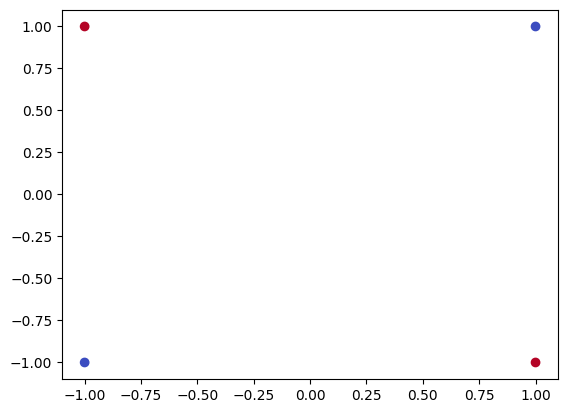

In [6]:
print(xor_y.shape)
print(xor_x.shape)
plt.scatter(x=xor_x[:,0], y=xor_x[:,1], c=xor_y, cmap='coolwarm')

Линейно разделимые данные:

(200, 2)


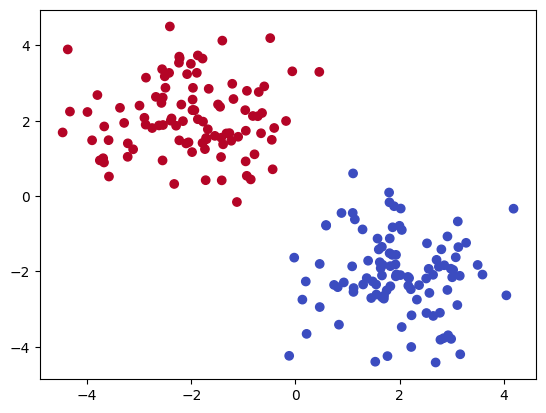

In [7]:
print(lin_sep_x.shape)

plt.scatter(x=lin_sep_x[:,0], y=lin_sep_x[:,1], c=lin_sep_y, cmap='coolwarm')

Линейно неразделимые данные:

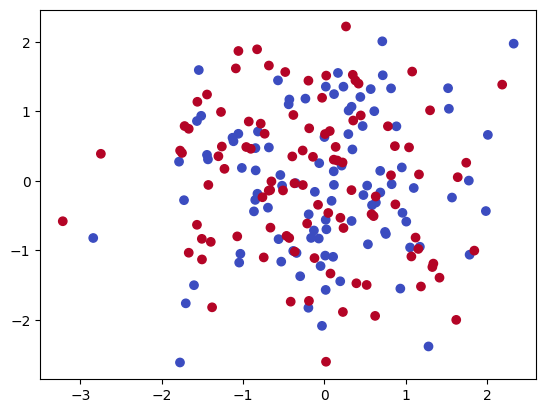

In [8]:
plt.scatter(x=nonlin_x[:,0], y=nonlin_x[:,1], c=nonlin_y, cmap='coolwarm')

Обучим модели:

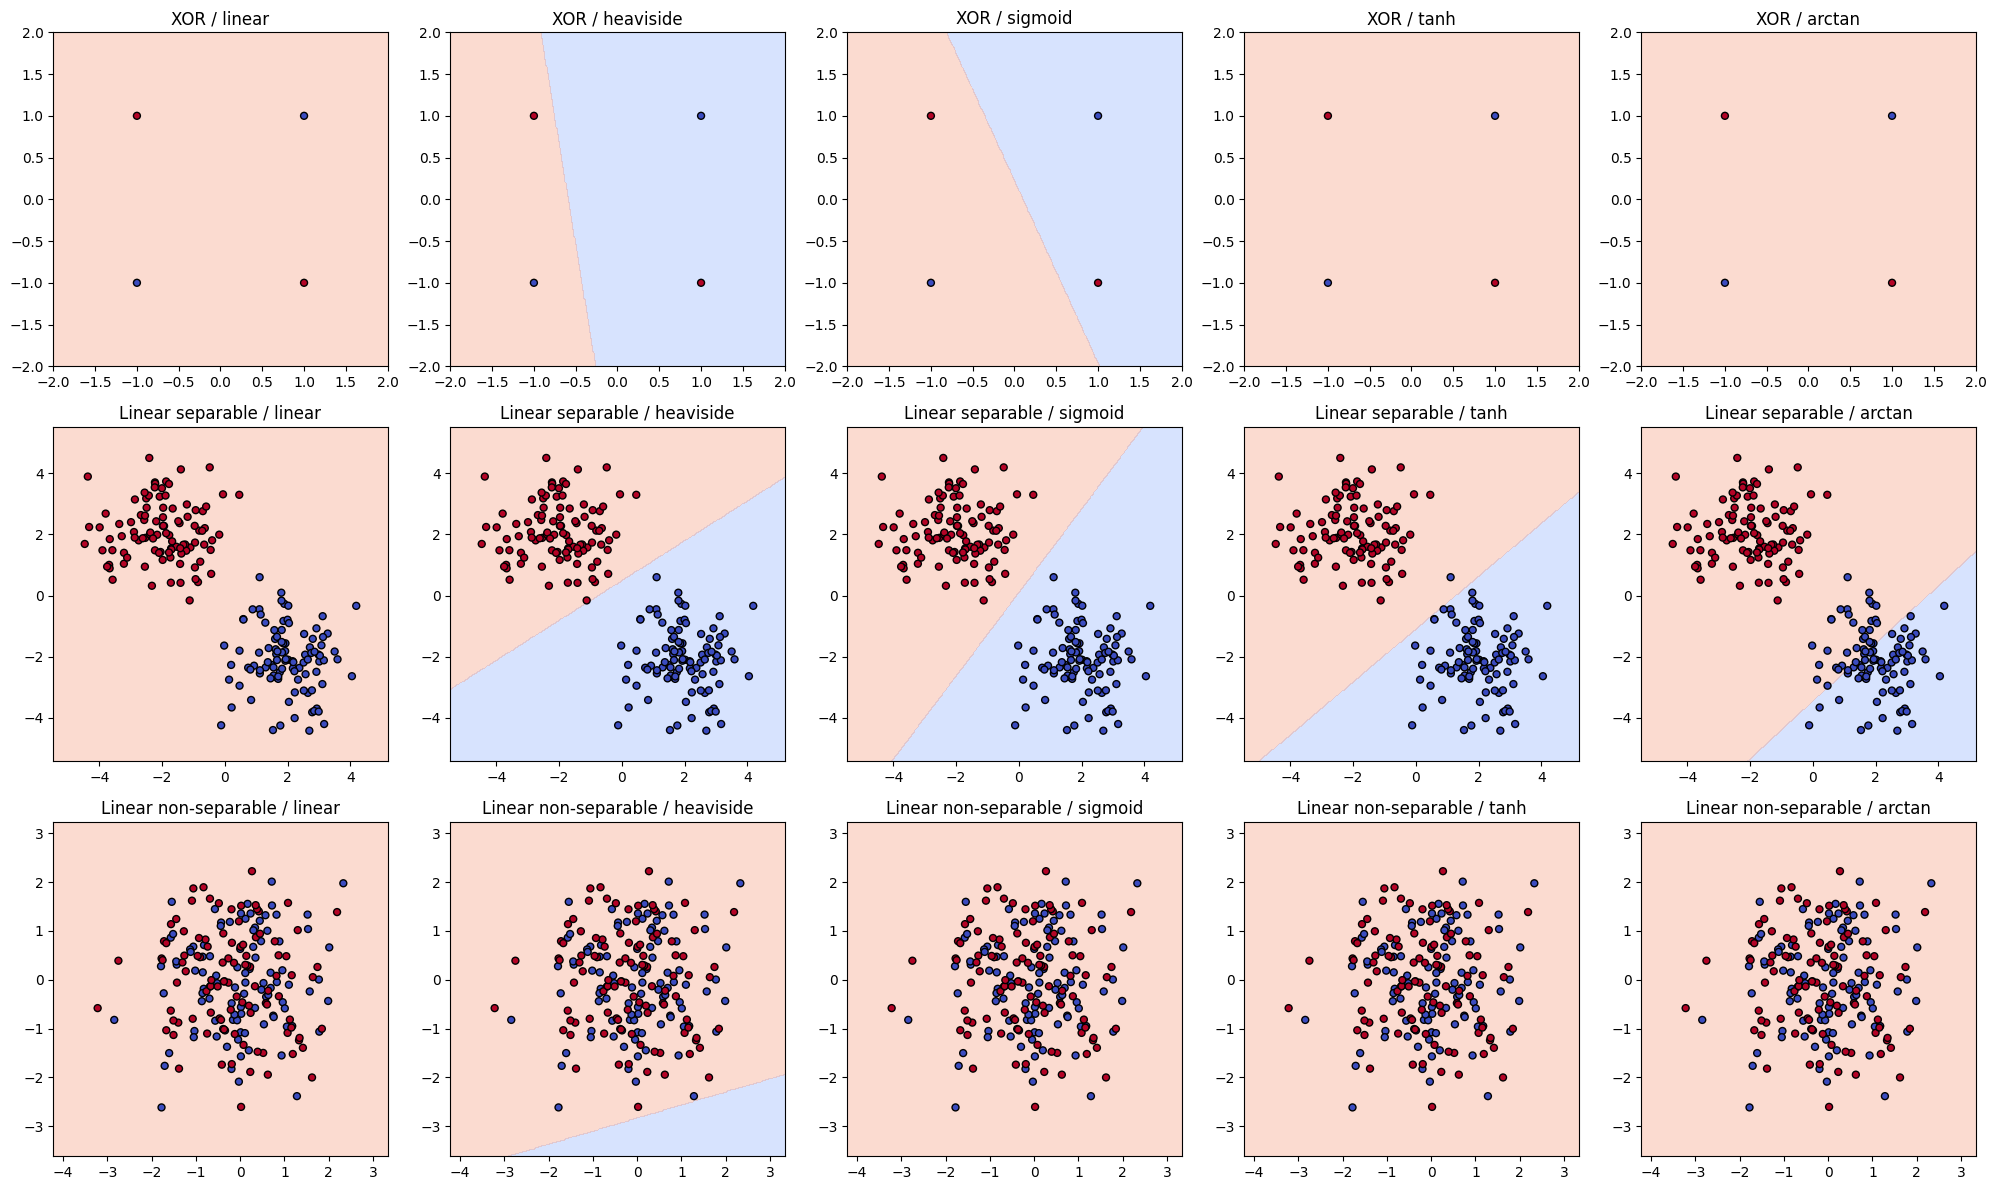

In [9]:
datasets = {
    'XOR': (xor_x, xor_y),
    'Linear separable': (lin_sep_x, lin_sep_y),
    'Linear non-separable': (nonlin_x, nonlin_y),
}

def plot_decision_regions(model, X, y, to_class, ax, title):
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    raw = np.array([model.predict(p)[0] for p in grid]).reshape(xx.shape)
    Z = to_class(raw)

    ax.contourf(xx, yy, Z, alpha=0.35, cmap='coolwarm', levels=[-0.5, 0.5, 1.5])
    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y.reshape(-1),
        cmap='coolwarm',
        edgecolors='k',
        s=25,
    )
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


fig, axes = plt.subplots(nrows=len(datasets), ncols=len(activations), figsize=(20, 12))

for row_idx, (ds_name, (X, y)) in enumerate(datasets.items()):
    for col_idx, (act_name, (act_fn, to_class)) in enumerate(activations.items()):
        model = Perceptron(2, 1, act_fn)
        model.fit(X, y, lr=0.1, epochs=50, verbose=False)

        ax = axes[row_idx, col_idx]
        plot_decision_regions(
            model,
            X,
            y,
            to_class,
            ax,
            title=f"{ds_name} / {act_name}",
        )

plt.tight_layout()
plt.show()


# Answers to questions

1. Что делает функция активации в искусственном нейроне?
> Функция активации определяет величину выходного сигнала в зависимости от значений сигналов на входе
2. Чем отличается искусственный нейрон от однослойного перцептрона
> Однослойный перцептрон является слоем из искуственных нейронов
3. Какое правило используется для обучения перцептрона?
> Используется правило перцептрона:
> 
> $W = W + \eta * (y - y_{pred}) * x^T$
> 
> $b = b + \eta * (y - y_{pred})$
>
> где $W$ - матрица весов слоя, $b$ - вектор смещений, $y$ - истинные значения, $y_{pred}$ - предсказанные значения, $\eta$ - скорость обучения
4. Почему однослойный перцептрон не может решить задачу XOR?
> Потому что однослойный перцептрон может разделять только линейно разделимые множества точек
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?
> - Можно использовать градиентный спуск для обучения
> - Выход становится непрерывным -> можно строить вероятности принадлежности классу